In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint as pp
import csv
import datetime
from dateutil.parser import parse
from pandas.tools.plotting import scatter_matrix
from patsy import dmatrices
import statsmodels.formula.api as smf
from sklearn import cross_validation
from sklearn import datasets
from sklearn import svm
import seaborn as sns
import statsmodels.api as sm
import matplotlib as mpl
from numpy.random import randn
from scipy import stats
from pprint import pprint as pp
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import cross_val_score
from sklearn import metrics, preprocessing
from IPython.display import display
import urllib2
from pandas import Series
from pandas import merge, concat
%matplotlib inline

sns.set_palette("deep", desat=.8)
sns.set_context(rc={"figure.figsize": (14, 8)})

In [2]:
url           = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data"

newrl         = urllib2.urlopen(url)
newdata_df    = pd.read_csv(newrl, header=-1)

newdata_df.head()

,0
0,1 0 63 1 -9 -9 -9
1,-9 1 145 1 233 -9 50 20
2,1 -9 1 2 2 3 81 0
3,0 0 0 0 1 10.5 6 13
4,150 60 190 90 145 85 0 0


In [4]:
cleve_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data"
newrl = urllib2.urlopen(cleve_url)
colus = list(range(1,15))
cleve_df = pd.read_csv("switz.data", header=None, delimiter="name\n")
# id_data = cleve_df[0].str.strip("[]").str.split(",").tolist()
# df_id = pd.DataFrame(id_data, columns=colus, index=cleve_df.index, dtype=int)
# cleve_df = cleve_df.join(df_id)
cleve_df.columns = ["name"]
r1 = cleve_df[0::10]
r2 = cleve_df[1::10]
r3 = cleve_df[2::10]
r4 = cleve_df[3::10]
r5 = cleve_df[4::10]
r6 = cleve_df[5::10]
r7 = cleve_df[6::10]
r8 = cleve_df[7::10]
r9 = cleve_df[8::10]
r10 = cleve_df[9::10]
# cleve_df

In [5]:
cleve_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data"
newrl = urllib2.urlopen(cleve_url)
cleve_df = pd.read_csv(newrl, header=None)
# cleve_df = read_table(newrl, index_col=[0,1,2])
cleve_df.head()

,0
0,1 0 63 1 -9 -9 -9
1,-9 1 145 1 233 -9 50 20
2,1 -9 1 2 2 3 81 0
3,0 0 0 0 1 10.5 6 13
4,150 60 190 90 145 85 0 0


In [50]:
def all_models(df):
    models = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(max_depth=6), RandomForestClassifier(), KNeighborsClassifier(n_neighbors=11), SVC()]
    data = []
    x_all = df.iloc[:,1:]
    y_all = df.iloc[:,0]
    x_scaled = preprocessing.scale(x_all)
    for model in models:
        m = model
        avg_acc = np.mean(cross_val_score(m, x_scaled, y_all, scoring='recall'))
        avg_prec = np.mean(cross_val_score(m, x_scaled, y_all, scoring='precision'))
        avg_rec = np.mean(cross_val_score(m, x_scaled, y_all, scoring='recall'))
        avg_f1 = np.mean(cross_val_score(m, x_scaled, y_all, scoring='f1'))
        
        data.append([avg_acc,avg_prec,avg_rec,avg_f1])
    index=['Logistic', 'Gaussian', 'DecisionTree', 'RandomForest', 'KNN', 'SVC']
    columns = ['accuracy', 'precision', 'recall', 'F1']
    df = pd.DataFrame(data, index=index, columns=columns)
    return df

def create_df(filename):
    df = pd.read_csv(filename)
    df = df.replace(-9, np.nan)
    df = df.fillna(df.mean())
    df["num"] = df["num"].replace(2,1).replace(3,1).replace(4,1)
    drops = ["painloc", "painexer","years", "relrest", "rldv5", "id", "smoke", "ccf", "lvx1", "pncaden", "exeref", "earlobe", "thalpul", "exerwm", "restwm", "exerckm", "restckm", "restef", "lvx2", "lvx3", "lvx4", "lvf", "cathef", "junk","ekgmo", "ekgday", "proto", "dig", "prop", "nitr", "pro", "diuretic", "thalsev", "cmo", "cday", "lmt", "ladprox", "laddist", "diag","cxmain", "ramus", "om1", "om2", "rcaprox", "rcadist"]
    df = df.drop(drops, axis=1)
    cols = df.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df = df[cols]
    return df

def loc_dummies(df):
    dummies = pd.get_dummies(df['location'])
    atom_col = [c for c in dummies.columns if '*' not in c]
    for col in atom_col:
        df[col] = dummies[[c for c in dummies.columns if col in c]].sum(axis=1)
    df = df.drop(['location'], axis=1)
    return df

In [52]:
chdf = create_df("ch.csv")
hungdf = create_df("hung.csv")
lbdf = create_df("longbeach.csv")
clevedf = create_df("cleve.csv")
combineddf = create_df("total2.csv")


chdf = loc_dummies(chdf)
hungdf = loc_dummies(hungdf)
lbdf = loc_dummies(lbdf)
clevedf = loc_dummies(clevedf)
combineddf = combineddf.drop(["location"], axis=1)


ch_scores = all_models(chdf)
hung_scores = all_models(hungdf)
lb_scores = all_models(lbdf)
cleve_scores = all_models(clevedf)
combined_scores = all_models(combineddf)

print "Switzerland:"
display(ch_scores)
print "Hungary:"
display(hung_scores)
print "Longbeach:"
display(lb_scores)
print "Cleveland:"
display(cleve_scores)
print "Combined:"
display(combined_scores)

Switzerland:


,accuracy,precision,recall,F1
Logistic,0.871120,0.934029,0.871120,0.896510
Gaussian,0.621682,0.916284,0.621682,0.677467
DecisionTree,0.870895,0.934084,0.879667,0.902335
RandomForest,0.939721,0.931916,0.974359,0.943707
KNN,1.000000,0.935134,1.000000,0.966449
SVC,1.000000,0.935134,1.000000,0.966449


Hungary:


,accuracy,precision,recall,F1
Logistic,0.764550,0.818964,0.764550,0.790079
Gaussian,0.943915,0.450700,0.943915,0.604046
DecisionTree,0.661111,0.720050,0.670635,0.686393
RandomForest,0.660317,0.778387,0.698148,0.734079
KNN,0.679365,0.828243,0.679365,0.746392
SVC,0.717460,0.864583,0.717460,0.783207


Longbeach:


,accuracy,precision,recall,F1
Logistic,0.845442,0.814734,0.845442,0.829111
Gaussian,0.683810,0.831046,0.683810,0.743911
DecisionTree,0.758367,0.743803,0.778639,0.748862
RandomForest,0.905714,0.769865,0.804898,0.816101
KNN,0.946667,0.758123,0.946667,0.841601
SVC,0.993333,0.743706,0.993333,0.850567


Cleveland:


,accuracy,precision,recall,F1
Logistic,0.766357,0.807442,0.766357,0.772645
Gaussian,0.584785,0.815051,0.584785,0.634432
DecisionTree,0.703252,0.665281,0.671506,0.681209
RandomForest,0.654472,0.774242,0.726868,0.742669
KNN,0.751452,0.771996,0.751452,0.760358
SVC,0.750678,0.804160,0.750678,0.768177


Combined:


,accuracy,precision,recall,F1
Logistic,0.674747,0.871909,0.674747,0.724275
Gaussian,0.557576,0.893875,0.557576,0.623950
DecisionTree,0.787879,0.800235,0.797980,0.740158
RandomForest,0.670707,0.826252,0.612121,0.731237
KNN,0.739394,0.845990,0.739394,0.766355
SVC,0.773737,0.852577,0.773737,0.796584


In [69]:
train, test = train_test_split(chdf, train_size = 0.8)
x_train  = train.iloc[:,1:]
y_train  = train.iloc[:,0]
x_test   = test.iloc[:,1:]
y_test   = test.iloc[:,0]
train.head(10)

,num,age,sex,cp,trestbps,htn,chol,cigs,fbs,dm,...,trestbpd,exang,xhypo,oldpeak,slope,rldv5e,ca,thal,cyr,switzerland
3,1,50,1,4,145.000000,0.000000,0,25.454545,0.104167,1,...,90.000000,1,0,0.700000,2.000000,13.00000,1.6,5.69863,84.000000,1
19,1,41,1,4,125.000000,0.354839,0,25.454545,0.104167,1,...,70.000000,0,0,1.600000,1.000000,8.00000,1.6,5.69863,85.000000,1
101,1,57,1,4,160.000000,0.354839,0,25.454545,0.104167,1,...,90.000000,1,0,2.000000,2.000000,14.73913,1.6,7.00000,84.000000,1
112,1,35,1,4,130.206612,0.000000,0,25.454545,0.104167,1,...,81.942149,1,0,0.653846,1.801887,14.73913,1.6,7.00000,84.000000,1
46,1,64,0,4,95.000000,0.354839,0,25.454545,0.104167,1,...,75.000000,0,0,1.100000,3.000000,7.00000,1.6,5.69863,84.596491,1
23,1,57,1,3,105.000000,0.354839,0,25.454545,0.104167,1,...,80.000000,0,0,0.300000,2.000000,8.00000,1.6,5.69863,85.000000,1
63,1,46,1,4,115.000000,0.000000,0,25.454545,0.000000,1,...,90.000000,1,0,1.500000,2.000000,14.73913,1.6,7.00000,84.000000,1
38,1,56,1,4,115.000000,0.354839,0,25.454545,0.104167,1,...,80.000000,0,0,-1.000000,1.000000,20.00000,1.6,5.69863,85.000000,1
68,1,47,1,4,160.000000,1.000000,0,25.454545,0.000000,1,...,85.000000,1,0,0.000000,2.000000,14.73913,1.6,7.00000,84.000000,1
37,1,60,1,3,115.000000,0.000000,0,25.454545,0.104167,1,...,80.000000,0,0,2.400000,1.000000,20.00000,1.6,5.69863,85.000000,1


AUC is: 0.347826


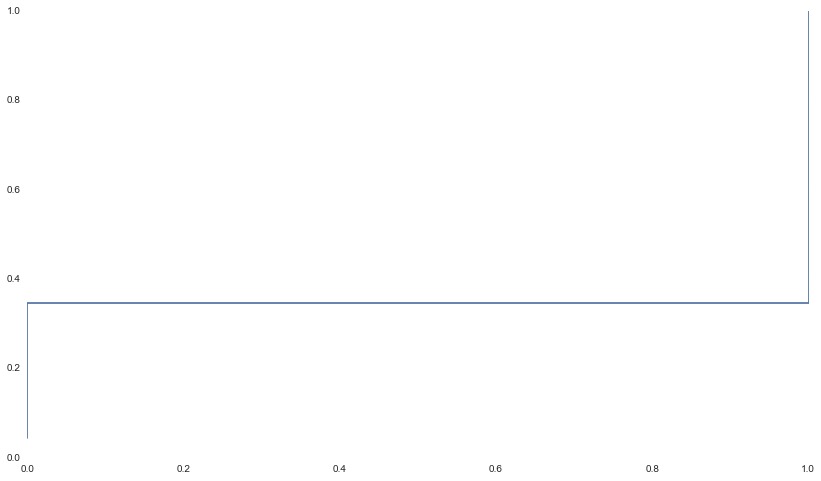

In [72]:
model = LogisticRegression()
probas_ = model.fit(x_train, y_train)
y_pred_proba  = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print "AUC is: %f" % roc_auc
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

AUC is: 0.750000


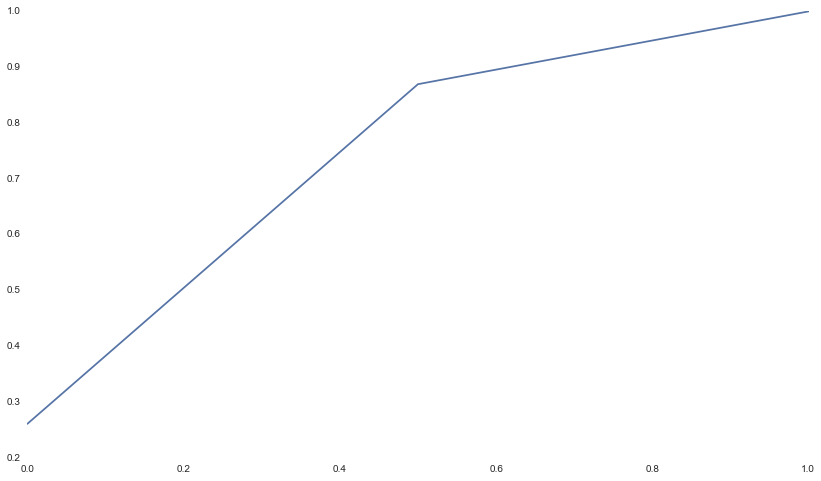

In [73]:
model = KNeighborsClassifier(n_neighbors=16)
probas_ = model.fit(x_train, y_train)
y_pred_proba  = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print "AUC is: %f" % roc_auc
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

AUC is: 0.869565


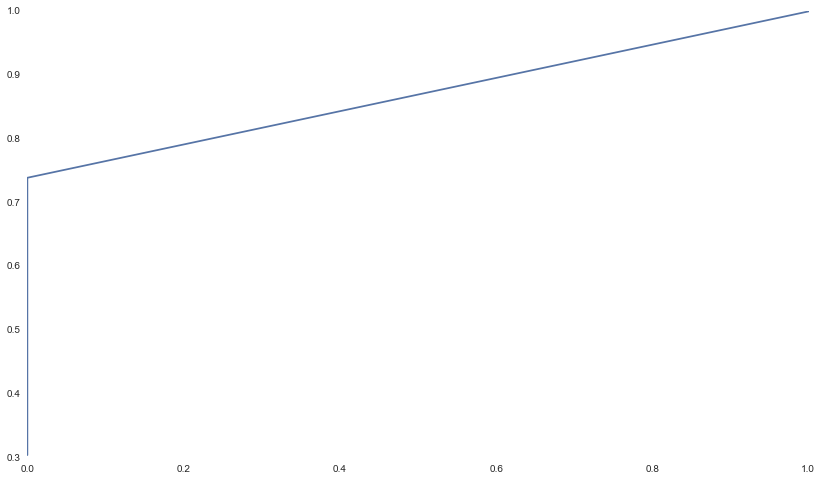

In [74]:
model = GaussianNB()
probas_ = model.fit(x_train, y_train)
y_pred_proba  = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print "AUC is: %f" % roc_auc
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

AUC is: 0.728261


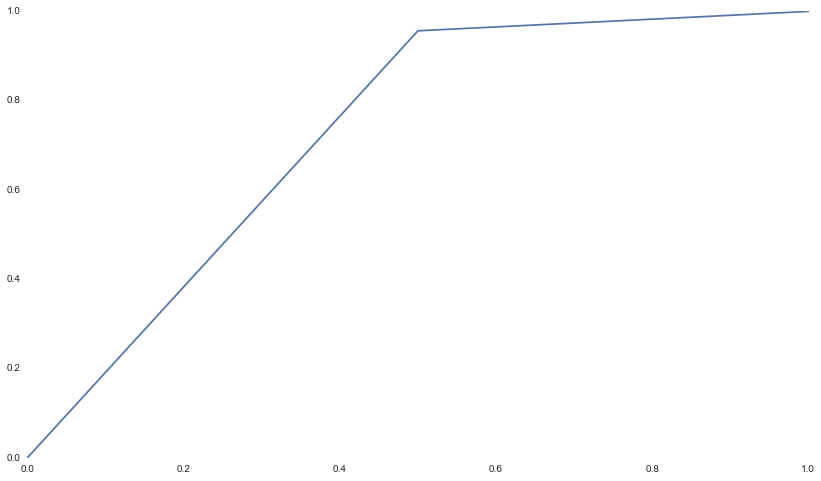

In [75]:
model = DecisionTreeClassifier()
probas_ = model.fit(x_train, y_train)
y_pred_proba  = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print "AUC is: %f" % roc_auc
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

AUC is: 0.652174


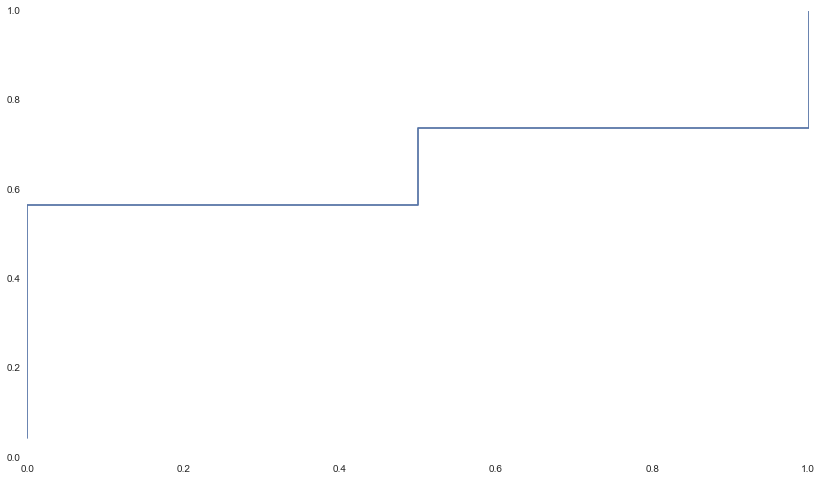

In [76]:
model                   = SVC(kernel="linear", probability=True)
probas_ = model.fit(x_train, y_train)
y_pred_proba  = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print "AUC is: %f" % roc_auc
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

AUC is: 0.195652


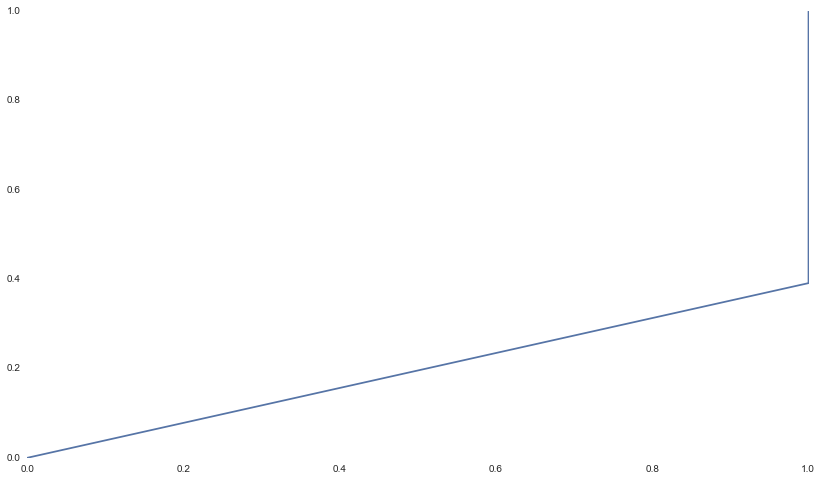

In [77]:
model                   = RandomForestClassifier()
probas_ = model.fit(x_train, y_train)
y_pred_proba  = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print "AUC is: %f" % roc_auc
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)